# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# test tensorflow to check if Tensorflow is active with GPU
import tensorflow as tf
# Creates a graph.
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
    # Creates a session with log_device_placement set to True.
    sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
    # Runs the op.
    print (sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/sdutta/CarND-Traffic-Sign-Classifier-Project/train.p'
testing_file = '/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [40]:
### Replace each question mark with the appropriate value.
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import cv2 as cv2

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?

img = X_train[0]
image_shape = X_train[0].shape


#imshow(RGBshifted)


#plt.figure(figsize=(1,1))
#plt.imshow(image_shape)
#print(y_train[index])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

def color_jitter(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    RGBshifted = np.dstack( (
        np.roll(R, 10, axis=0), 
        np.roll(G, 10, axis=1), 
        np.roll(B, -10, axis=0)
        ))
    return RGBshifted



def zitter(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 defaul color code is BGR
    h,w,c = img.shape # (768, 1024, 3)

    noise = np.random.randint(0,50,(h, w)) # design jitter/noise here
    zitter = np.zeros_like(img)
    zitter[:,:,1] = noise  
    #print(h)

    noise_added = cv2.add(img, zitter)
    #print(noise_added)
    #combined = np.vstack((img[:ceil(h/2),:,:], noise_added[ceil(h/2):,:,:]))
    
    #imshow(combined, interpolation='none')
    return noise_added

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 39209


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

index 11708
Label 10


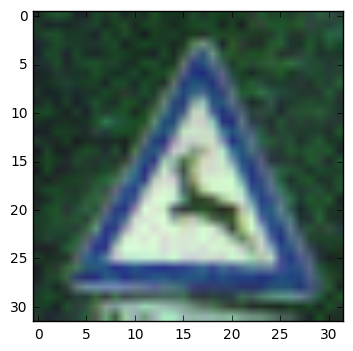

In [41]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
print ("index %d" %index)
image = X_train[10420]
jittered_image = color_jitter(image)
zitter_image = zitter(image)
#plt.imshow(image)

print("Label %d" %y_train[index])
#plt.imshow(jittered_image)
plt.imshow(zitter_image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [42]:
# Shuffle the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [43]:
### Preprocess the data here.

### Following the steps for LeNET defined earlier.
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # out_height = ceil(float(32 - 5 + 1) / float(1)) = 28
    # out_width = ceil(float(32 - 5 + 1) / float(1)) = 28
    # out_width = 6 [Filter Width]
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma))  
    conv1_b =  tf.Variable(tf.zeros(6))
    
    #Conv Layer1
    conv1 =  tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1,keep_prob)
    
    #pool
    # new_height = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14
    # new_width = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14 
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x 6.
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    # out_height = ceil(float(14 - 5 + 1) / float(1)) = 10
    # out_width = ceil(float(14 - 5 + 1) / float(1)) = 10
    # out_width = 16 [Filter Width]
 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b =  tf.Variable(tf.zeros(16))
    
   
    #conv2 = tf.nn.conv2d(pool1,conv2_W,strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    conv2 = tf.nn.conv2d(norm1,conv2_W,strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    # new_height = ceil(float(10 - 2 + 1) / float(2)) = ceil(4.5) = 5
    # new_width = ceil(float(10 - 2 + 1) / float(2)) = ceil(4.5) = 5 
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')
   
    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 4x4x32.
    # out_height = ceil(float(5 - 2 + 1) / float(1)) = 4
    # out_width = ceil(float(5 - 2 + 1) / float(1)) = 4
    # out_width = 16 [Filter Width]
    conv3_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 16, 32), mean = mu, stddev = sigma))
    conv3_b =  tf.Variable(tf.zeros(32))
    
    conv3 = tf.nn.conv2d(norm2,conv3_W,strides=[1, 1, 1, 1], padding='VALID') + conv3_b 

    # SOLUTION: Pooling. Input = 4x4x32. Output = 2x2x32.
    # new_height = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
    # new_width = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.

    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.lrn(conv3, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')
 
    
     #fc1 = tf.nn.dropout(fc1,keep_prob)   
    # SOLUTION: Flatten. Input = 2x2x32. Output = 128.
    print (conv3.get_shape())
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 3200. Output = 4096.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(128, 120), mean = mu, stddev = sigma))
    
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.add(tf.matmul(fc0, fc1_W),fc1_b)
    #Activation
    fc1 = tf.nn.relu(fc1)
    
    #fc1 = tf.nn.dropout(fc1,keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2,keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #print (logits.get_shape())
    
    return logits


In [44]:
# Features and Labels
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [45]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
a) I split the training data into 2 parts, Training and Validation
b) Used the Shuffle method to shuffle the data


Size of X_data 35288
Size of Y_data 35288
8490
13
Size of X_data 70576
Size of Y_data 70576
43778
13


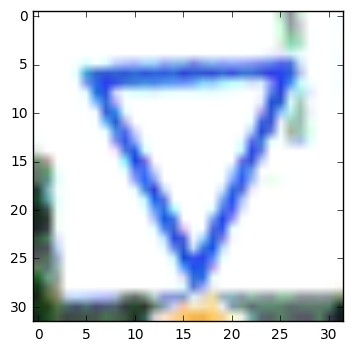

In [46]:
### Generate additional data (OPTIONAL!)
def zitter(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 defaul color code is BGR
    h,w,c = img.shape # (768, 1024, 3)

    noise = np.random.randint(0,50,(h, w)) # design jitter/noise here
    zitter = np.zeros_like(img)
    zitter[:,:,1] = noise  
    #print(h)

    noise_added = cv2.add(img, zitter)
    #print(noise_added)
    #combined = np.vstack((img[:ceil(h/2),:,:], noise_added[ceil(h/2):,:,:]))
    
    #imshow(combined, interpolation='none')
    return noise_added

### and split the data into training/validation/testing sets here.

#Split the data
from sklearn.cross_validation import train_test_split

X_data,x_valid, y_data, y_valid  = train_test_split(X_train,y_train,test_size=0.1)

print ("Size of X_data", len(X_data))
print ("Size of Y_data", len(y_data))

index_i = random.randint(0,len(X_data))
print(index_i)
print (y_data[index_i])
plt.imshow(X_data[index_i])

#Adding the Zitter images to the original set
Zittered_images = []
Zittered_labels = []

for index in range(len(X_data)):
    img = X_data[index]
    zitter_image = zitter(img)
    Zittered_images.append(zitter_image)
    Zittered_labels.append(y_data[index])
    
original_X_data_len = len(X_data)
X_data = np.vstack((X_data,Zittered_images))
y_data = np.hstack((y_data, Zittered_labels))

#index_i = random.randint(0,len(X_data))
print ("Size of X_data", len(X_data))
print ("Size of Y_data", len(y_data))

index_i += original_X_data_len
print(index_i)
print (y_data[index_i])
plt.imshow(X_data[index_i])


### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

### Define your architecture here.

The original dataset had 2 files. Training and test. I split the training into 2 parts (Training and Validation). Then I added new dataset by jittering the images on the RGB plane. This is defined in the function zitter(). The new dataset is twice the old dataset with each image being jittered.



In [47]:
#Learning Rate
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

(?, 2, 2, 32)


In [48]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# Take the average
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# This is for saving the model
saver = tf.train.Saver()
BATCH_SIZE = 128
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.85})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The Architecture looks like

Input -> Conv-> Pool -> Norm -> Conv ->Pool->Norm ->Conv ->Pool-> Norm->Fc1->Fc2>

In [49]:
### Train your model here.
import time

init =  tf.global_variables_initializer()
num_examples =  len(X_data)   
EPOCHS = 250

start_time_full = time.time()
print("Start Time %s ---" % (time.time() ))
with tf.Session() as sess:
    sess.run(init)
    print("Training...")
    print()
    for i in range(EPOCHS):
        start_time = time.time()
        X_train, y_train = shuffle(X_data, y_data)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_data[offset:end], y_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.85})

        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("--- %s seconds ---" % (time.time() - start_time))
        print()
        
    saver.save(sess, './Traffic_Sign_lenet_batch_128.p')
    print("Model saved")

print("--- Total Time %s seconds ---" % (time.time() - start_time_full))

### Feel free to use as many code cells as needed.

Start Time 1485838739.771502 ---
Training...

EPOCH 1 ...
Validation Accuracy = 0.387
--- 3.5340404510498047 seconds ---

EPOCH 2 ...
Validation Accuracy = 0.761
--- 3.5023765563964844 seconds ---

EPOCH 3 ...
Validation Accuracy = 0.863
--- 3.447150468826294 seconds ---

EPOCH 4 ...
Validation Accuracy = 0.892
--- 3.4923245906829834 seconds ---

EPOCH 5 ...
Validation Accuracy = 0.914
--- 3.49548602104187 seconds ---

EPOCH 6 ...
Validation Accuracy = 0.932
--- 3.503704786300659 seconds ---

EPOCH 7 ...
Validation Accuracy = 0.937
--- 3.502229690551758 seconds ---

EPOCH 8 ...
Validation Accuracy = 0.945
--- 3.4957756996154785 seconds ---

EPOCH 9 ...
Validation Accuracy = 0.950
--- 3.474785327911377 seconds ---

EPOCH 10 ...
Validation Accuracy = 0.944
--- 3.4754998683929443 seconds ---

EPOCH 11 ...
Validation Accuracy = 0.963
--- 3.4401094913482666 seconds ---

EPOCH 12 ...
Validation Accuracy = 0.963
--- 3.4909143447875977 seconds ---

EPOCH 13 ...
Validation Accuracy = 0.960
--- 

In [50]:
###Test your Model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
   

Test Accuracy = 0.938


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Batch_size = 128
[I have tried with larger batch size but the accuracy goes down significanly. Which I do not understand as why this happens. Since as per the class increasing the batch size should increase the accuracy.]

**EPOCHS = 250

I have used 250 EPOCHS as more the epochs, the better the result which I have found.

**Optimizer = AdamOptimizer**


**dropout= None**
I tried adding dropouts, but this did not help.

**Norm **
I have added this. This seems to increase the accuracy and also the accuracy rate increases quickly.

**Adding more data**
Adding more data has not helped it seems. I got 99.1% accuracy on non jittered data. But with jittered data, the accuracy seems to have reduced the accurancy.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

- I started with LeNet that was taught in the previous chapter
- Changed the Epoch and the batch size.
    Increasing the Epoch Size helped a lot
    Changing batch size I did not get better result
- Tried changing the filter sizes. It seems to have got bad results.
- Tried adding dropout. The accuracy went down, so I commented it out.
- I added a Norm Layer. I saw 231n in one of the architectures, adding the norm layer bumped the accuracy.
    

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [129]:
### Load the images and plot them here.
from PIL import Image
from scipy import misc
import glob
import matplotlib.pyplot as plt
from numpy import array
import math
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

def predict(img):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction = tf.argmax(logits, 1)
        print (filename)
        im = Image.open(filename).convert('RGB')
        resized_img = im.resize([32,32])
        inp_image = array(resized_img).reshape(1,32,32,3)
        y = prediction.eval(feed_dict={x: inp_image}, session=sess)        
        return y

### Feel free to use as many code cells as needed.

In [130]:
import pandas as pd

df = pd.read_csv('./signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [131]:
df.columns.values.tolist()

['ClassId', 'SignName']

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/No_U_Turn.png
[40]


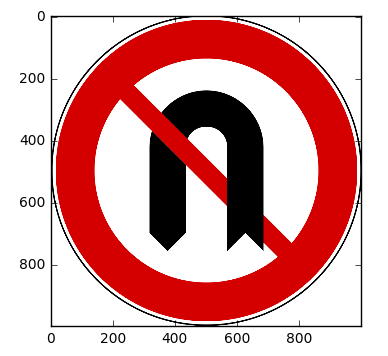

In [133]:
### Run the predictions here.
filename = "/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/No_U_Turn.png"
img = misc.imread(filename)
y = predict(filename)
print (y)
plt.imshow(img)

### Feel free to use as many code cells as needed.

/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/Traffic_Stop.png
[14]


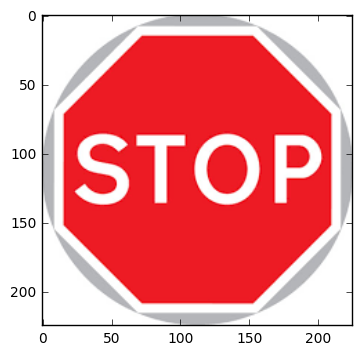

In [134]:
filename = "/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/Traffic_Stop.png"
img = misc.imread(filename)
print(predict(filename))
plt.imshow(img)



/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/Do_not_enter.png
[13]


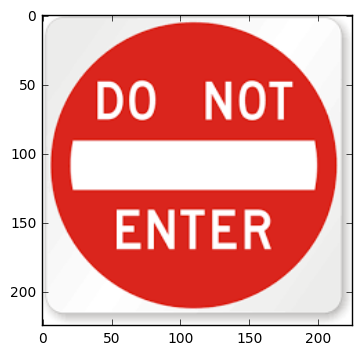

In [135]:
filename = "/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/Do_not_enter.png"
img = misc.imread(filename)
print(predict(filename))
plt.imshow(img)


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

One in 3 images have come out to be correct. That is 33%

In [136]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [137]:
def top_k(img):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction = tf.argmax(logits, 1)
        print (filename)
        im = Image.open(filename).convert('RGB')
        resized_img = im.resize([32,32])
        inp_image = array(resized_img).reshape(1,32,32,3)
        top_k = tf.nn.top_k(logits,k=3)
        y = sess.run(top_k,feed_dict={x: inp_image})     
        return y





/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/No_U_Turn.png
TopKV2(values=array([[ 8.75492191,  6.55791664,  3.98925161]], dtype=float32), indices=array([[40, 11,  7]], dtype=int32))


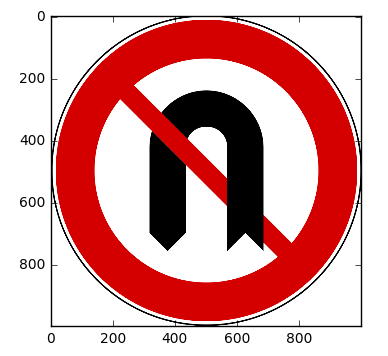

In [138]:
filename = "/home/sdutta/CarND-Traffic-Sign-Classifier-Project/test_images/No_U_Turn.png"
img = misc.imread(filename)
y = top_k(filename)
print (y)
plt.imshow(img)


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.